<a href="https://www.kaggle.com/code/ericmungaikinuthia/car-price-prediction-data-visualization?scriptVersionId=116238097" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds/diamonds.csv
/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


In [2]:
df = pd.read_csv("/kaggle/input/car-price-prediction/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
df.info

<bound method DataFrame.info of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible   

In [5]:
x=df['enginesize'].values
y=df['price'].values
x, y

(array([130, 130, 152, 109, 136, 136, 136, 136, 131, 131, 108, 108, 164,
        164, 164, 209, 209, 209,  61,  90,  90,  90,  90,  98,  90,  90,
         90,  98, 122, 156,  92,  92,  79,  92,  92,  92,  92, 110, 110,
        110, 110, 110, 110, 111,  90,  90, 119, 258, 258, 326,  91,  91,
         91,  91,  91,  70,  70,  70,  80, 122, 122, 122, 122, 122, 122,
        140, 134, 183, 183, 183, 183, 234, 234, 308, 304, 140,  92,  92,
         92,  98, 110, 122, 156, 156, 156, 122, 122, 110, 110,  97, 103,
         97,  97,  97,  97,  97,  97,  97,  97, 120, 120, 181, 181, 181,
        181, 181, 181, 120, 152, 120, 152, 120, 152, 120, 152, 120, 152,
        134,  90,  98,  90,  90,  98, 122, 156, 151, 194, 194, 194, 203,
        132, 132, 121, 121, 121, 121, 121, 121,  97, 108, 108, 108, 108,
        108, 108, 108, 108, 108, 108, 108,  92,  92,  92,  92,  92,  92,
         98,  98, 110, 110,  98,  98,  98,  98,  98,  98,  98, 146, 146,
        146, 146, 146, 146, 122, 110, 122, 122, 122

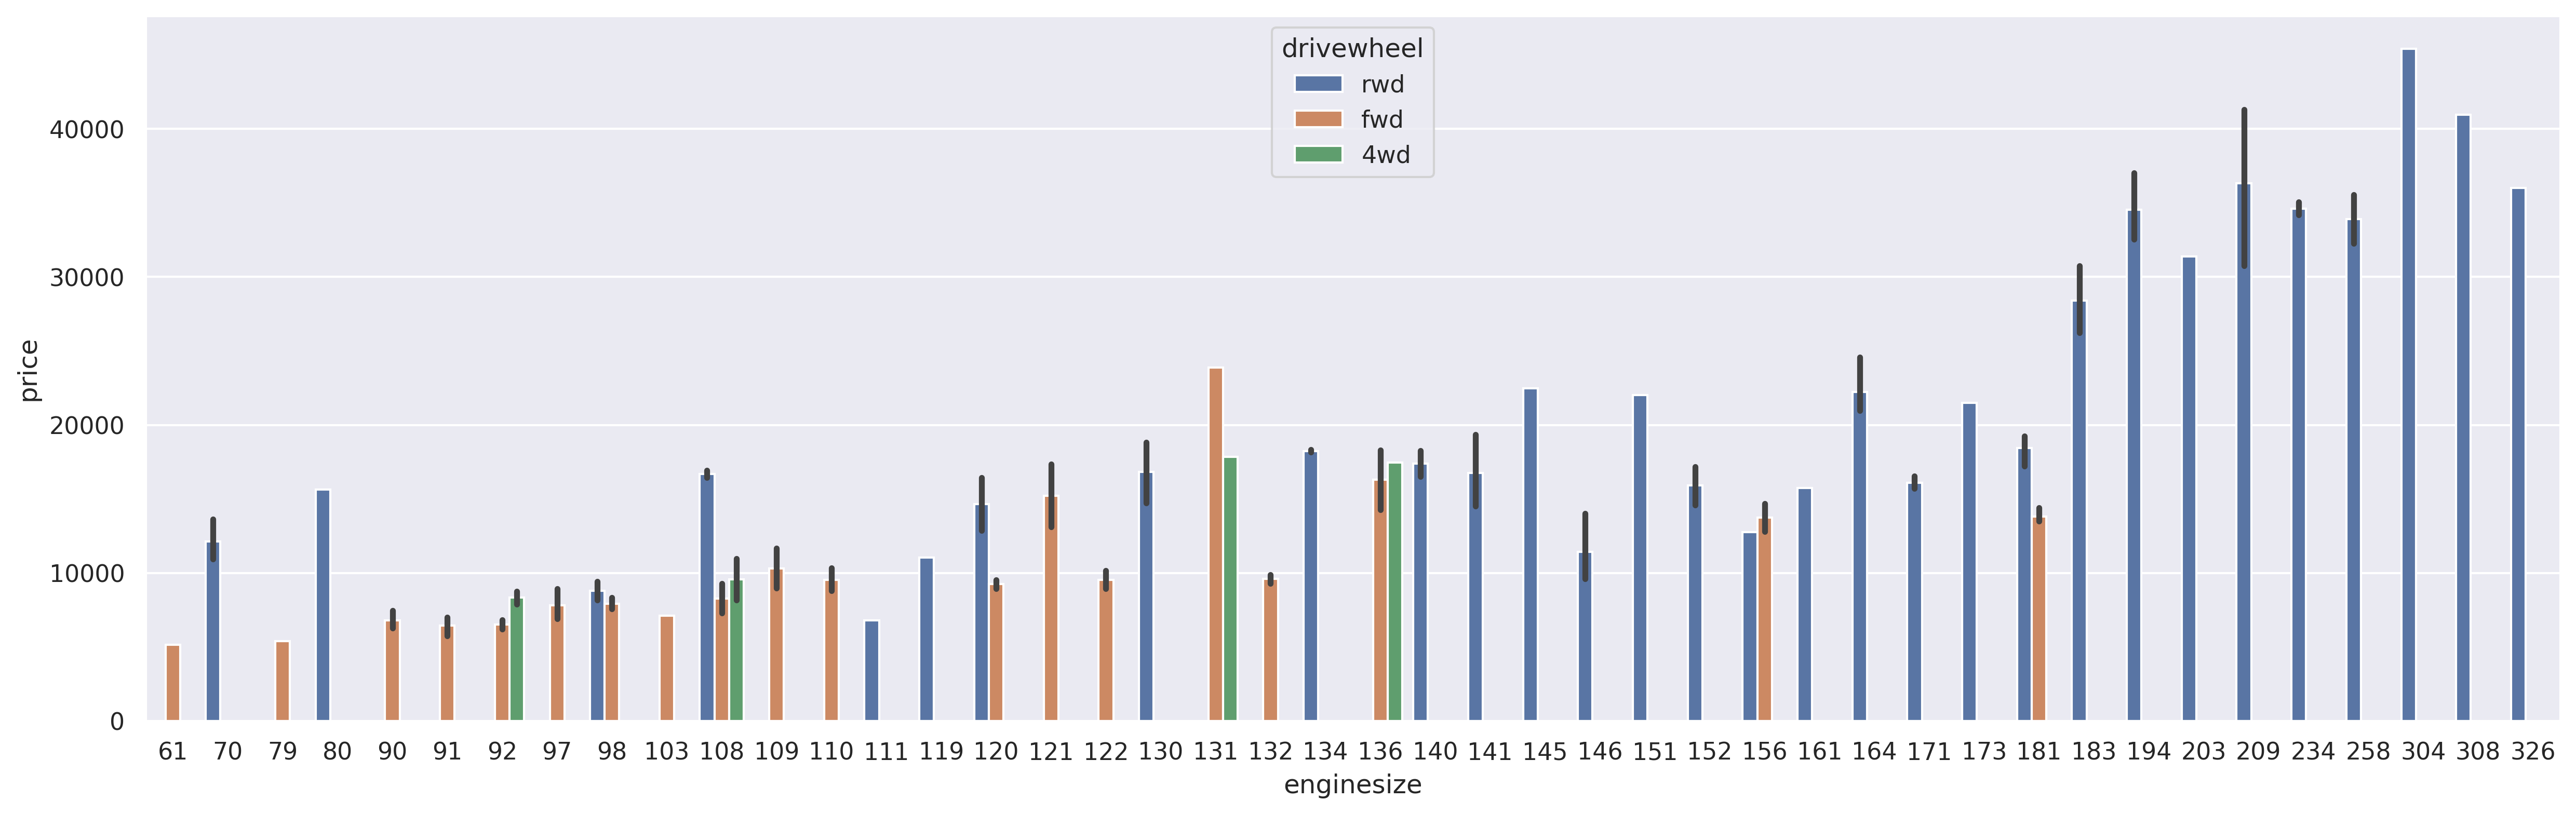

In [6]:
sns.set()
plt.figure(figsize=(20,6),dpi=300)
lineplot = sns.barplot(data=df, x="enginesize", y="price", hue="drivewheel")


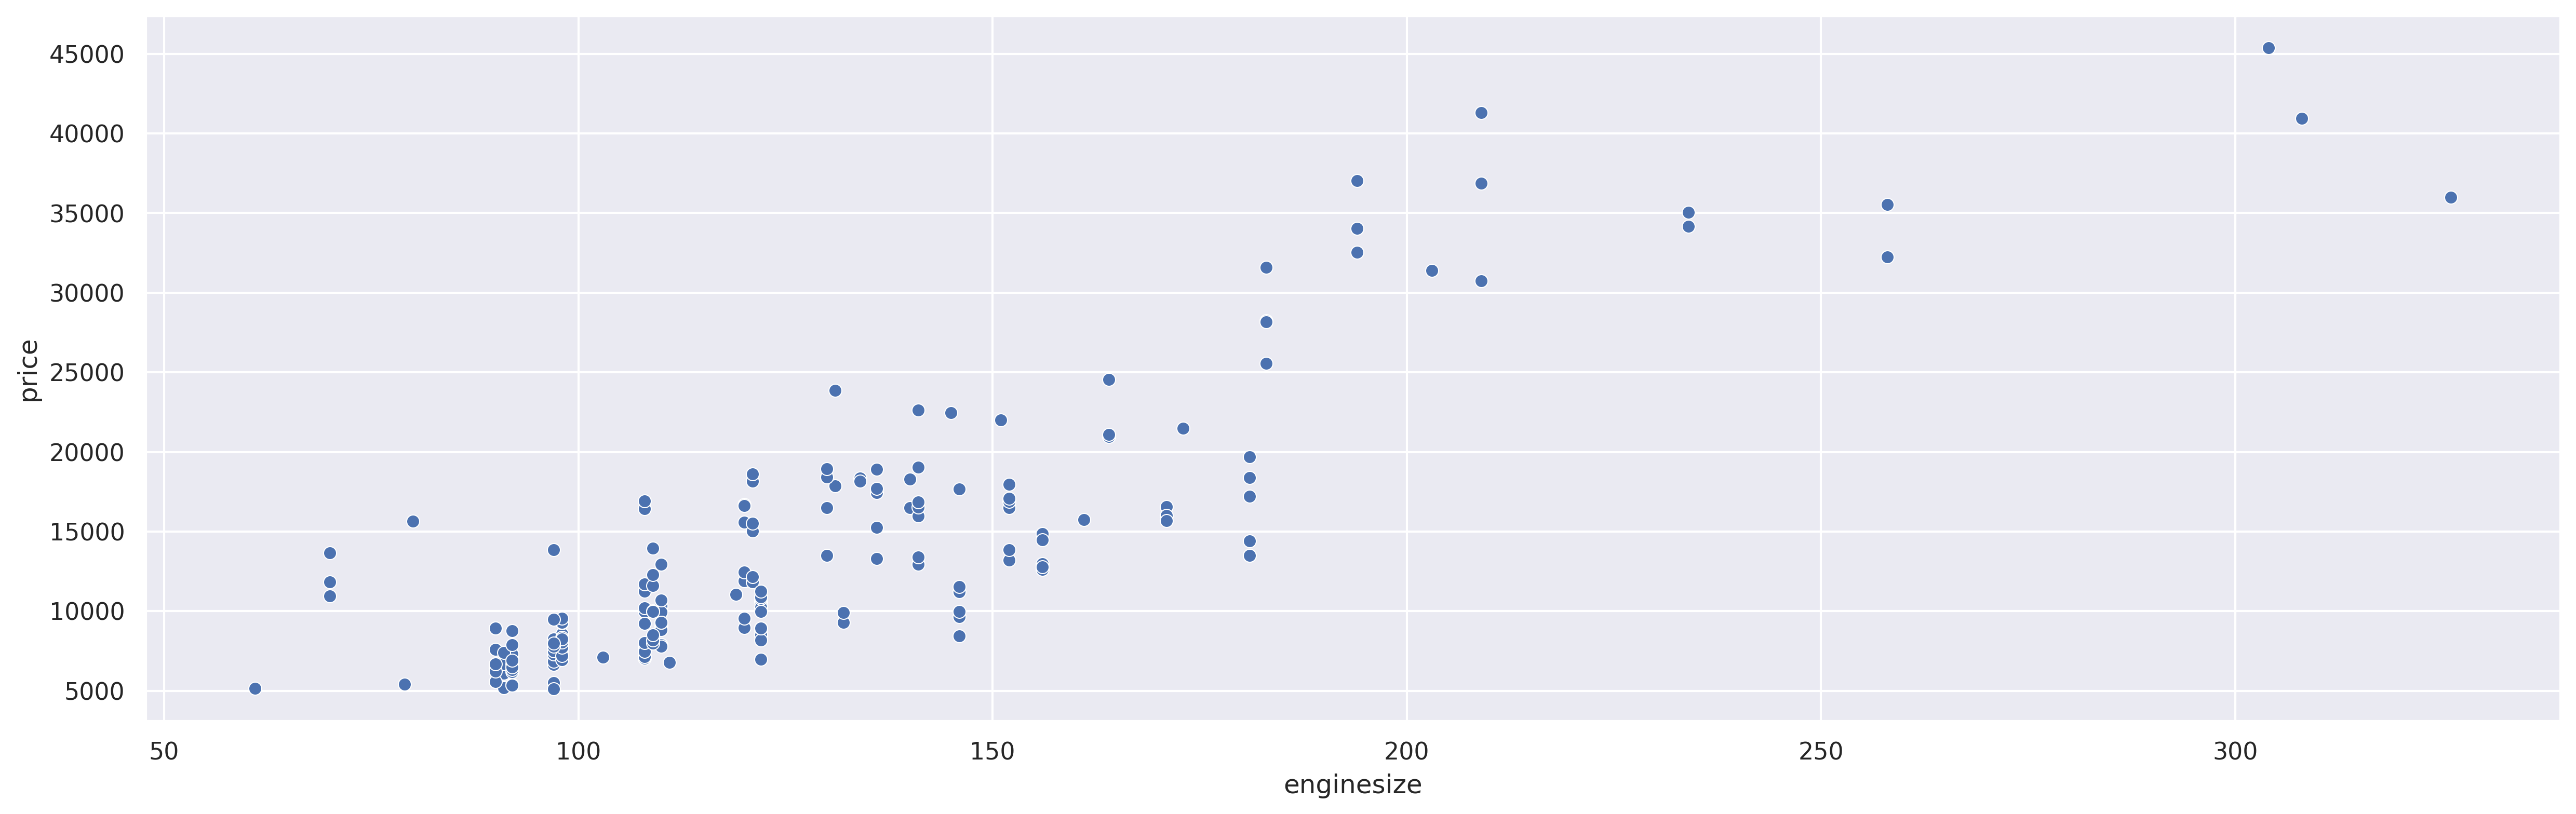

In [7]:
sns.set()
plt.figure(figsize=(20,6),dpi=300)
scatterplot = sns.scatterplot(data=df, x="enginesize", y="price")

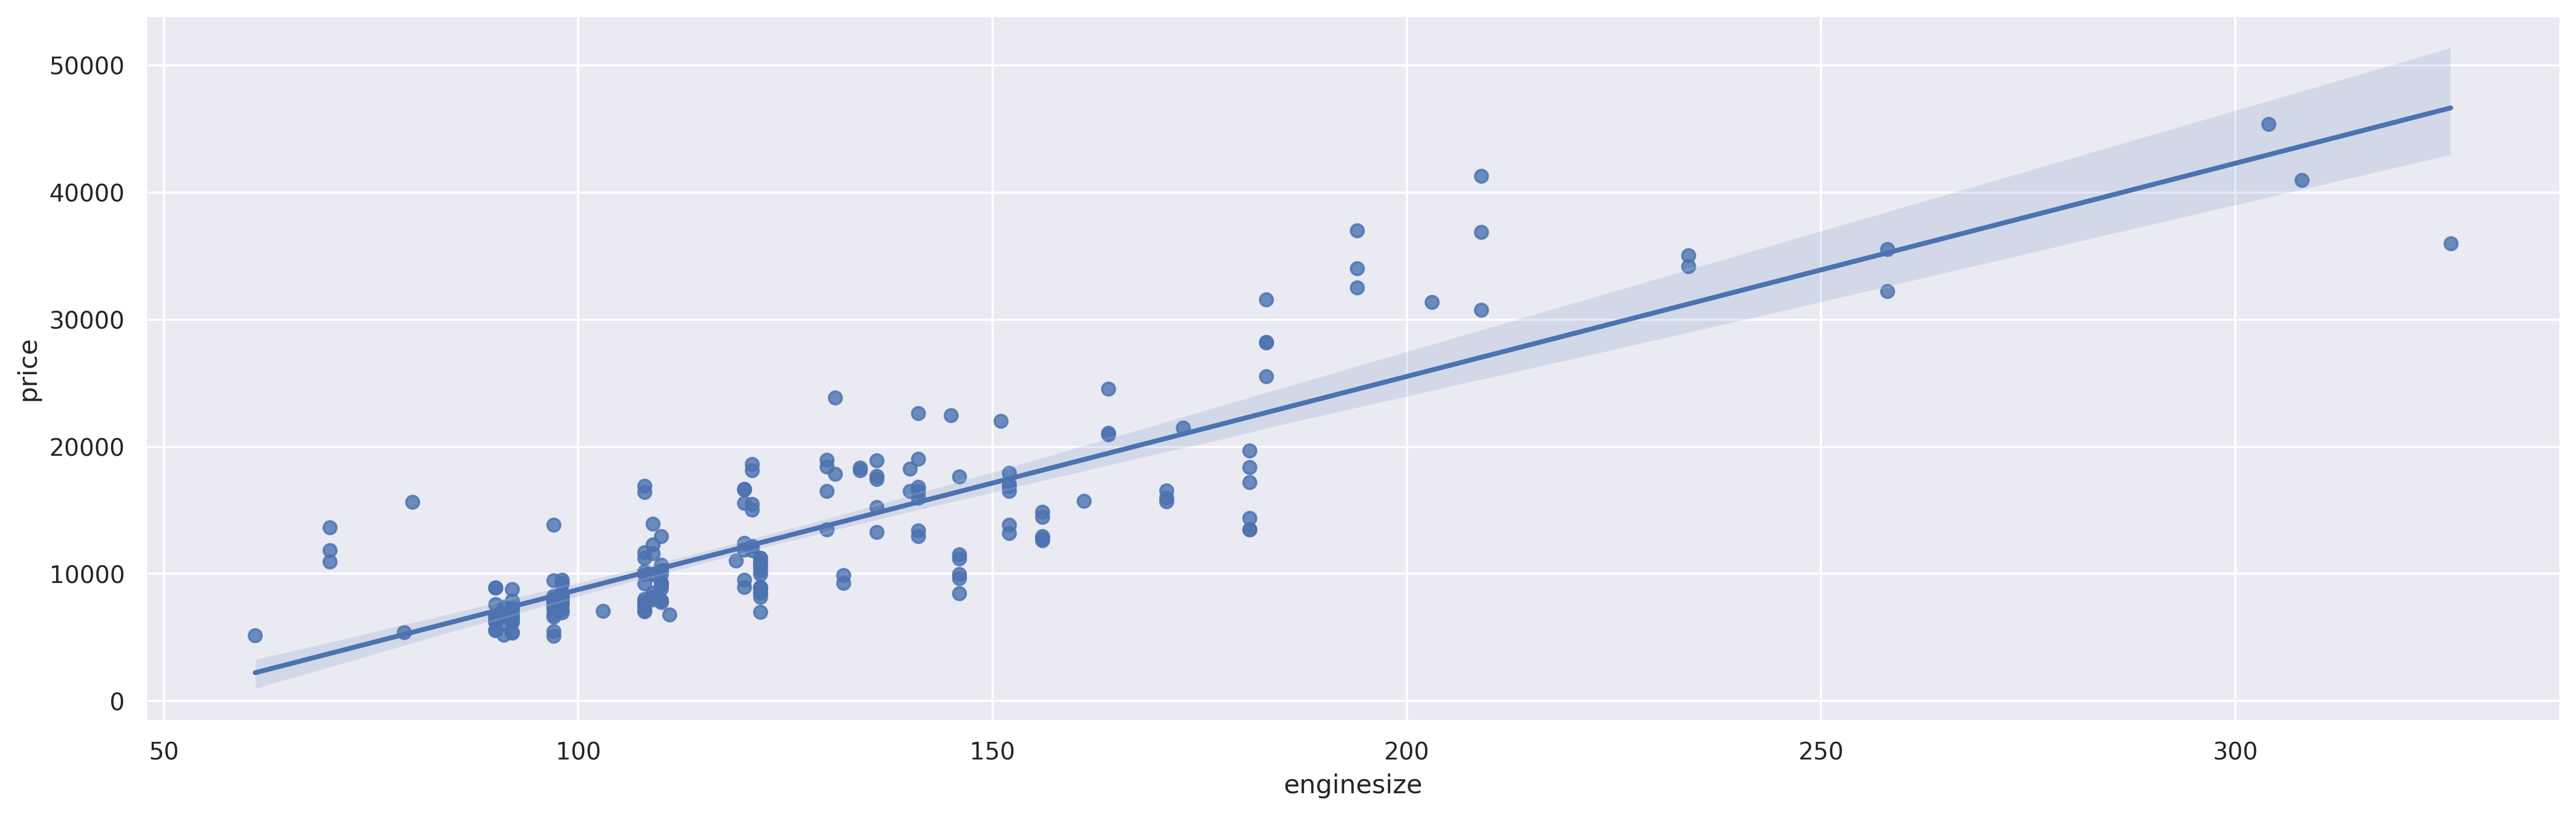

In [8]:
sns.set()
plt.figure(figsize=(20,6),dpi=300)
relplot = sns.regplot(data=df, x="enginesize", y="price")

# Conclusions

* From this data we can conclude that the car price increases with increase in engine size i.e direct relationship

* Most cars have an engine size between 80 to 150

* Most cars have a price range between 5000 to 20000